In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from betting_utils import *

%load_ext autoreload
%autoreload 2


# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)

Using TensorFlow backend.


## EPL

### Data Train (Season 2009/2010 until Season 2015/2016)

In [2]:
df1 = pd.read_csv("datasets/EPL_sort.csv", index_col=0)
df1 = df1[df1['season'] != '2008/2009']
df1 = df1[['match_api_id','B365H', 'B365D', 'B365A']]
df1.head()

,match_api_id,B365H,B365D,B365A
382,658575,1.67,3.60,5.50
385,658578,3.60,3.25,2.10
386,658579,2.25,3.25,3.25
389,658582,1.17,6.50,21.00
383,658576,3.20,3.25,2.30


In [3]:
df2 = pd.read_csv("datasets/epl_data_train_onehot_matchid.csv")
df2.head()

,match_api_id,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,1987033,0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3
1,1987034,1,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-9
2,1987035,1,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-13
3,1987036,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,4
4,1987037,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1


In [4]:
df_train = df1.set_index('match_api_id').join(df2.set_index('match_api_id'))
df_train = df_train.reset_index()
df_train = df_train.drop(columns = ['match_api_id'])
df_train.tail(10)

,B365H,B365D,B365A,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
2650,1.17,9.00,17.00,2,0.61,0.281250,0.433735,0.911392,0.026316,0.026316,0,3,0,3,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0.657895,-1.184211,0.000000,0.210526,-11
2651,2.30,3.75,3.10,1,0.58,0.697917,0.626506,0.443038,0.026316,0.078947,0,1,0,3,1,3,0,3,0,3,0,0,0,0,0,0,0,0,0.157895,0.842105,-0.052632,-0.157895,-15
2652,1.80,4.00,4.50,2,0.56,0.406250,0.662651,0.810127,0.000000,0.078947,1,1,3,1,0,3,1,1,1,1,0,0,0,0,0,0,1,0,0.026316,-0.657895,-0.078947,0.026316,-13
2653,4.50,4.00,1.80,2,0.39,0.708333,0.771084,0.379747,0.026316,0.000000,0,3,0,0,3,1,0,0,3,3,0,0,0,0,0,0,0,0,-0.657895,1.000000,0.026316,0.026316,4
2654,1.36,5.50,9.00,2,0.55,0.395833,0.481928,0.594937,0.078947,0.078947,3,3,3,0,3,3,1,1,0,0,0,0,0,0,0,0,0,0,0.394737,-0.236842,0.000000,0.210526,-3
2655,3.50,3.60,2.15,2,0.39,0.666667,0.650602,0.620253,0.000000,0.078947,1,0,1,1,1,3,1,3,3,0,0,0,1,0,0,0,0,0,-0.394737,0.394737,-0.078947,-0.236842,-4
2656,6.00,4.75,1.53,1,0.41,0.729167,0.614458,0.506329,0.078947,0.026316,3,3,1,1,3,0,1,3,0,3,0,0,0,0,0,0,0,0,-0.263158,0.789474,0.052632,0.026316,11
2657,2.05,3.75,3.70,1,0.38,0.479167,0.578313,0.759494,0.000000,0.078947,1,1,3,1,3,3,3,0,0,3,0,0,0,0,0,0,0,0,-0.263158,-0.368421,-0.078947,-0.131579,4
2658,2.40,3.60,3.00,1,0.33,0.645833,0.566265,0.620253,0.026316,0.026316,0,1,0,1,1,0,3,1,0,3,0,0,0,0,0,0,0,0,-0.368421,0.342105,0.000000,-0.157895,15
2659,1.67,4.20,5.25,2,0.46,0.458333,0.409639,0.810127,0.000000,0.026316,1,3,0,3,3,0,1,1,1,3,0,0,0,0,0,0,0,0,0.315789,-0.526316,-0.026316,0.157895,-11


### Data Test (Season 2008/2009)

In [5]:
df3 = pd.read_csv("datasets/EPL_sort.csv", index_col=0)
df3 = df3[df3['season'] == '2008/2009']
df3 = df3[['match_api_id','B365H', 'B365D', 'B365A']]
df3.head()

,match_api_id,B365H,B365D,B365A
1,489043,1.20,6.5,15.00
7,489049,1.83,3.5,4.50
5,489047,2.00,3.3,4.00
8,489050,2.60,3.2,2.80
6,489048,3.20,3.4,2.25


In [6]:
df4 = pd.read_csv("datasets/epl_data_test_onehot_matchid.csv")
df4.head()

,match_api_id,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,489043,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-14
1,489049,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-11
2,489047,0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-4
3,489050,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0
4,489048,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,7


In [7]:
df_test = df3.set_index('match_api_id').join(df4.set_index('match_api_id'))
df_test = df_test.reset_index()
df_test = df_test.drop(columns = ['match_api_id'])
df_test.tail(10)

,B365H,B365D,B365A,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
370,1.33,5.0,10.00,2,0.64,0.385417,0.433735,0.645570,0.026316,0.078947,0,1,3,3,0,3,3,1,1,3,0,0,0,0,0,0,0,0,0.736842,-0.368421,-0.052632,-0.026316,-14
371,2.30,3.4,3.10,2,0.53,0.416667,0.578313,0.734177,0.026316,0.000000,0,1,3,0,0,1,3,1,0,1,0,0,0,0,0,0,0,0,0.131579,-0.473684,0.026316,0.052632,-2
372,1.83,3.5,4.50,1,0.40,0.375000,0.722892,0.848101,0.000000,0.000000,1,3,1,3,1,1,3,1,3,1,0,0,0,0,0,0,0,0,-0.526316,-0.815789,0.000000,0.000000,-8
373,2.10,3.3,3.60,0,0.39,0.552083,0.385542,0.468354,0.078947,0.078947,3,3,1,3,0,3,0,3,1,0,0,0,0,0,0,0,0,0,0.184211,0.421053,0.000000,0.052632,12
374,3.00,3.5,2.30,0,0.39,0.697917,0.759036,0.303797,0.026316,0.026316,0,1,1,1,1,0,3,3,3,3,0,0,1,0,1,0,0,0,-0.631579,1.131579,0.000000,-0.315789,17
375,1.53,4.0,6.50,2,0.74,0.458333,0.313253,0.531646,0.078947,0.078947,3,3,3,3,0,3,0,3,1,3,0,0,0,0,0,0,0,0,1.263158,0.052632,0.000000,0.078947,-2
376,1.73,3.6,5.00,2,0.57,0.427083,0.602410,0.658228,0.000000,0.026316,1,1,3,3,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0.184211,-0.289474,-0.026316,0.131579,7
377,4.00,3.6,1.91,0,0.32,0.677083,0.614458,0.278481,0.000000,0.078947,1,0,1,1,3,3,3,3,3,0,0,0,0,0,0,0,0,0,-0.500000,1.131579,-0.078947,-0.236842,16
378,2.25,3.4,3.20,2,0.40,0.281250,0.530120,0.696203,0.000000,0.026316,1,1,3,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,-0.105263,-0.736842,-0.026316,0.052632,3
379,2.10,3.4,3.50,2,0.33,0.395833,0.542169,0.708861,0.000000,0.078947,1,1,1,0,1,3,1,1,0,1,0,0,0,0,0,0,0,0,-0.315789,-0.473684,-0.078947,-0.078947,9


## Preprocessing

In [8]:
x_train = df_train.drop(columns = ['FTR'])
y_train = df_train['FTR']
x_test = df_test.drop(columns = ['FTR'])
y_test = df_test['FTR']
bet_train = df_train[['B365H', 'B365D', 'B365A']]
bet_test = df_test[['B365H', 'B365D', 'B365A']]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(bet_train.shape)
print(bet_test.shape)

(2660, 32)
(2660,)
(380, 32)
(380,)
(2660, 3)
(380, 3)


In [9]:
columns = x_train.values.shape[1]
columns

32

## First neural model start here

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

# 41-75-3
# We first need to define the sequence of dependencies (the computational graph)
# x = Input(shape=(20,32))
x = Input(shape=(columns,))
# h = Conv2D(32, (7, 7), strides=(2, 2))(x)
# h = Activation('relu')(x)
h = Flatten()(x)
h = Dense(41)(h)
h = Dense(75)(h)
h = Dense(3)(h)
# for i in range(10):
#     h = Dense(75)(h)
h = Dropout(0.3)(h)
p = Activation('softmax')(h)

# Now that we have defined how to find p from x, we can create a 
# model simply by saying what is input and what is output
model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 41)                1353      
_________________________________________________________________
dense_1 (Dense)              (None, 75)                3150      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 228       
_________________________________________________________________
dropout (Dropout)            (None, 3)                 0         
_________________________________________________________________
activation (Activation)      (None, 3)                 0     

In [11]:
history = model.fit(x_train, y_train, batch_size=16, epochs=200, validation_split=0.04)

Epoch 1/200
160/160 [==============================] - 1s 4ms/step - loss: 4.7009 - accuracy: 0.2914 - val_loss: 3.2788 - val_accuracy: 0.3178
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 3.8198 - accuracy: 0.2949 - val_loss: 2.6184 - val_accuracy: 0.2991
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0234 - accuracy: 0.2899 - val_loss: 2.0187 - val_accuracy: 0.2897
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2318 - accuracy: 0.3071 - val_loss: 1.5492 - val_accuracy: 0.2991
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6868 - accuracy: 0.3337 - val_loss: 1.3081 - val_accuracy: 0.3832
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4612 - accuracy: 0.3717 - val_loss: 1.2172 - val_accuracy: 0.4206
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3237 - accuracy: 0.3980 - val_loss: 1.1777 - val_accuracy: 0.4112

Epoch 58/200
160/160 [==============================] - 1s 3ms/step - loss: 1.0142 - accuracy: 0.4634 - val_loss: 1.0112 - val_accuracy: 0.5327
Epoch 59/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0117 - accuracy: 0.4708 - val_loss: 1.0102 - val_accuracy: 0.5234
Epoch 60/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0060 - accuracy: 0.4818 - val_loss: 1.0083 - val_accuracy: 0.5234
Epoch 61/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0033 - accuracy: 0.4826 - val_loss: 1.0080 - val_accuracy: 0.5234
Epoch 62/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0066 - accuracy: 0.4767 - val_loss: 1.0098 - val_accuracy: 0.5234
Epoch 63/200
160/160 [==============================] - 1s 4ms/step - loss: 1.0060 - accuracy: 0.4716 - val_loss: 1.0086 - val_accuracy: 0.5234
Epoch 64/200
160/160 [==============================] - 0s 3ms/step - loss: 1.0013 - accuracy: 0.4959 - val_loss: 1.0064 - val_accuracy:

Epoch 115/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9934 - accuracy: 0.4865 - val_loss: 0.9914 - val_accuracy: 0.5327
Epoch 116/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9990 - accuracy: 0.4763 - val_loss: 0.9911 - val_accuracy: 0.5327
Epoch 117/200
160/160 [==============================] - 1s 4ms/step - loss: 0.9991 - accuracy: 0.4892 - val_loss: 0.9943 - val_accuracy: 0.5140
Epoch 118/200
160/160 [==============================] - 0s 3ms/step - loss: 0.9904 - accuracy: 0.4982 - val_loss: 0.9926 - val_accuracy: 0.5140
Epoch 119/200
160/160 [==============================] - 0s 3ms/step - loss: 0.9951 - accuracy: 0.4767 - val_loss: 0.9925 - val_accuracy: 0.5140
Epoch 120/200
160/160 [==============================] - 1s 3ms/step - loss: 0.9932 - accuracy: 0.4834 - val_loss: 0.9928 - val_accuracy: 0.5234
Epoch 121/200
160/160 [==============================] - 0s 3ms/step - loss: 0.9925 - accuracy: 0.4990 - val_loss: 0.9918 - val_ac

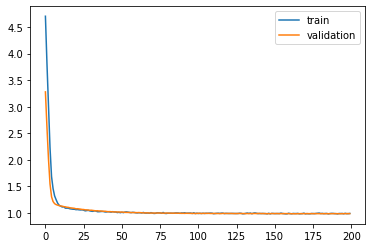

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

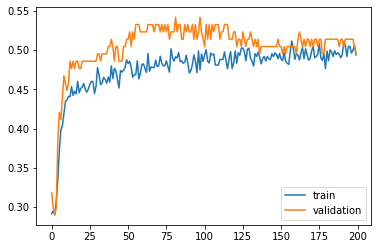

In [13]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [14]:
predictions = np.argmax(model.predict(x_test), axis=1)
accuracy = (predictions == y_test.values).sum() / y_test.values.shape[0]
print("Test set accuracy:", accuracy)

Test set accuracy: 0.5131578947368421


## Betting time...

### Outcome when bet on home team
Just a sanity check. Should not see high/any yields

In [15]:
## Profit for Away Wins Only 
predict_always_on_one_thing_benefit(y_train, bet_train, [0]) #Data Train
predict_always_on_one_thing_benefit(y_test, bet_test, [0]) #Data Test

Agency B365, 	win amount: 33.66
Agency B365, 	win amount: 50.57


In [16]:
## Profit for Draw Only 
predict_always_on_one_thing_benefit(y_train, bet_train, [1]) #Data Train
predict_always_on_one_thing_benefit(y_test, bet_test, [1]) #Data Test

Agency B365, 	win amount: -96.47
Agency B365, 	win amount: -25.46


In [17]:
## Profit for Home Wins Only 
predict_always_on_one_thing_benefit(y_train, bet_train, [2]) #Data Train
predict_always_on_one_thing_benefit(y_test, bet_test, [2]) #Data Test

Agency B365, 	win amount: 5112.06
Agency B365, 	win amount: 685.15


In [18]:
## Profit for Home or Away 
predict_always_on_one_thing_benefit(y_train, bet_train, [0, 2]) #Data Train
predict_always_on_one_thing_benefit(y_test, bet_test, [0, 2]) #Data Test

Agency B365, 	win amount: 5145.72
Agency B365, 	win amount: 735.72


In [19]:
## Profit for All Possibilities
predict_always_on_one_thing_benefit(y_train, bet_train, [0, 1, 2]) #Data Train
predict_always_on_one_thing_benefit(y_test, bet_test, [0, 1, 2]) #Data Test

Agency B365, 	win amount: 5049.25
Agency B365, 	win amount: 710.26


### Bet on every match
Always bet on the predicted winner.

In [20]:
train_predictions_3x1 = model.predict(x_train)
test_predictions_3x1 = model.predict(x_test)
train_predictions = np.argmax(train_predictions_3x1 , axis=1)
test_predictions = np.argmax(test_predictions_3x1 , axis=1)

In [21]:
# train_predictions
# test_predictions
# print(train_predictions_3x1.shape)
# print(test_predictions_3x1.shape)
# x_train.shape
# x_test.shape

In [22]:
always_bet_predicted_winner_profit(train_predictions, y_train, bet_train)
always_bet_predicted_winner_profit(test_predictions, y_test, bet_test)

Agency B365, 	win amount: 6610.12
Agency B365, 	win amount: 907.43


### Bet when expected return high enough
First calculate the expected return of the team expected to win. If yield is high enough, then bet. 
* yield = prediction probability * odds. 
* Bet if yield > threshold.

In [24]:
bet_predicted_winner_with_threshold_profit(train_predictions_3x1, train_predictions, y_train, bet_train, threshold=1)
bet_predicted_winner_with_threshold_profit(test_predictions_3x1, test_predictions, y_test, bet_test, threshold=1)

Agency B365, 	win amount: 7752.36. Didn't bet on 49.25% of matches
Agency B365, 	win amount: 1078.06. Didn't bet on 51.32% of matches


### Bet on highest return
Multiplies the neural network match predictions with betting odds and from these multiplications chooses from home win, draw, away win the highest expected return value. A threshhold can be set to choose if the yield is high enough to bet.  [prediction probability * odds > threshold]

In [26]:
predict_on_highest_return(train_predictions_3x1, y_train, bet_train, threshold=2.5)
predict_on_highest_return(test_predictions_3x1, y_test, bet_test, threshold=2.5)

Agency B365, 	win amount: -296.00. Didn't bet on 63.20% of matches
Agency B365, 	win amount: -37.00. Didn't bet on 64.47% of matches


## La Liga

### Data Train (Season 2009/2010 until Season 2015/2016)

In [27]:
df1 = pd.read_csv("datasets/LaLiga_sort.csv", index_col=0)
df1 = df1[df1['season'] != '2008/2009']
df1 = df1[['match_api_id','B365H', 'B365D', 'B365A']]
df1.head()

,match_api_id,B365H,B365D,B365A
380,684585,1.25,5.5,13.0
384,684589,1.91,3.4,4.2
381,684586,2.10,3.3,3.5
383,684588,2.88,3.2,2.5
389,684594,3.40,3.4,2.1


In [28]:
df2 = pd.read_csv("datasets/laliga_data_train_onehot_matchid.csv")
df2.head()

,match_api_id,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,2030084,1,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,4
1,2030083,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-15
2,2030090,1,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,6
3,2030087,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-5
4,2030091,1,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,7


In [29]:
df_train = df1.set_index('match_api_id').join(df2.set_index('match_api_id'))
df_train = df_train.reset_index()
df_train = df_train.drop(columns = ['match_api_id'])
df_train.tail(10)

,B365H,B365D,B365A,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
2650,1.95,3.75,3.75,0,0.393162,0.382609,0.602564,0.623377,0.000000,0.078947,1,1,0,3,3,3,1,0,1,1,0,0,0,0,0,0,0,0,-0.026316,-0.105263,-0.078947,0.078947,-8
2651,1.33,5.75,8.00,2,0.470085,0.434783,0.564103,0.610390,0.026316,0.000000,0,3,0,1,3,1,1,3,1,0,0,0,0,0,0,0,0,0,0.289474,0.078947,0.026316,0.105263,2
2652,1.75,3.75,4.50,2,0.521368,0.443478,0.230769,0.740260,0.000000,0.078947,1,3,3,3,3,3,1,3,0,0,1,0,0,0,0,0,0,0,1.131579,-0.157895,-0.078947,0.105263,-5
2653,26.00,11.00,1.08,0,0.393162,0.947826,0.846154,0.376623,0.078947,0.078947,3,3,1,3,1,3,3,3,3,1,0,0,0,0,0,0,0,0,-0.526316,2.105263,0.000000,-0.078947,16
2654,13.00,8.00,1.18,0,0.384615,0.939130,0.756410,0.441558,0.078947,0.078947,3,1,0,1,0,3,3,3,3,3,0,0,0,0,1,1,0,0,-0.368421,1.947368,0.000000,-0.263158,16
2655,1.80,3.75,4.50,2,0.290598,0.382609,0.435897,0.636364,0.000000,0.026316,1,3,1,0,1,0,1,3,1,0,0,0,0,0,0,0,0,0,0.000000,-0.131579,-0.026316,-0.026316,-9
2656,2.00,3.60,3.70,2,0.307692,0.408696,0.923077,0.740260,0.000000,0.026316,1,3,1,0,1,0,1,0,1,3,0,0,0,0,0,0,0,0,-0.947368,-0.263158,-0.026316,-0.026316,-8
2657,1.33,5.25,9.00,2,0.418803,0.313043,0.923077,0.870130,0.000000,0.078947,1,1,1,0,3,3,1,0,1,3,0,0,0,0,0,0,0,0,-0.605263,-0.815789,-0.078947,-0.078947,-3
2658,5.00,3.80,1.70,2,0.273504,0.313043,0.653846,0.844156,0.026316,0.026316,0,1,1,3,0,0,3,0,3,1,0,0,0,0,0,0,0,0,-0.500000,-0.763158,0.000000,-0.078947,3
2659,1.44,4.50,7.50,2,0.324786,0.382609,0.794872,0.428571,0.026316,0.000000,0,3,1,3,0,1,3,0,1,1,0,0,0,0,0,0,0,0,-0.631579,0.289474,0.026316,0.105263,12


### Data Test (Season 2008/2009)

In [30]:
df3 = pd.read_csv("datasets/LaLiga_sort.csv", index_col=0)
df3 = df3[df3['season'] == '2008/2009']
df3 = df3[['match_api_id','B365H', 'B365D', 'B365A']]
df3.head()

,match_api_id,B365H,B365D,B365A
7,530090,2.00,3.3,3.80
0,530023,1.70,3.6,5.25
8,530091,2.00,3.3,3.80
9,530092,1.44,4.2,7.50
1,530084,2.80,3.3,2.50


In [31]:
df4 = pd.read_csv("datasets/laliga_data_test_onehot_matchid.csv")
df4.head()

,match_api_id,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,530090,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-3
1,530023,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3
2,530091,0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3
3,530092,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-14
4,530084,1,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,15


In [32]:
df_test = df3.set_index('match_api_id').join(df4.set_index('match_api_id'))
df_test = df_test.reset_index()
df_test = df_test.drop(columns = ['match_api_id'])
df_test.tail(10)

,B365H,B365D,B365A,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
370,1.25,5.25,13.00,2,0.658120,0.391304,0.730769,0.753247,0.078947,0.000000,3,3,3,3,3,1,1,3,3,3,1,1,0,0,1,0,0,0,0.526316,-0.342105,0.078947,0.157895,-4
371,2.00,3.60,3.40,1,0.401709,0.904348,0.589744,0.441558,0.000000,0.000000,1,0,3,3,0,1,1,0,3,0,0,0,0,0,0,0,0,0,0.026316,1.842105,0.000000,0.078947,6
372,3.40,3.30,2.15,0,0.435897,0.504348,0.730769,0.675325,0.078947,0.078947,3,3,1,3,3,3,3,0,1,3,0,0,0,0,0,0,0,0,-0.157895,0.157895,0.000000,0.052632,5
373,1.36,4.75,8.50,2,0.564103,0.408696,0.692308,0.779221,0.000000,0.000000,1,1,3,1,0,1,1,3,0,3,0,0,0,0,0,0,0,0,0.315789,-0.342105,0.000000,-0.078947,-1
374,1.70,4.00,4.33,2,0.333333,0.713043,0.589744,0.649351,0.078947,0.000000,3,0,1,1,0,1,1,1,1,3,0,0,0,0,0,0,0,0,-0.184211,0.842105,0.078947,0.052632,16
375,4.20,3.60,1.83,0,0.324786,0.452174,0.858974,0.506494,0.000000,0.078947,1,3,0,3,1,3,0,3,3,1,0,0,0,0,0,0,0,0,-0.763158,0.342105,-0.078947,-0.078947,13
376,1.91,3.60,3.80,2,0.367521,0.478261,0.628205,0.727273,0.078947,0.026316,3,3,1,3,3,0,1,3,1,0,0,0,0,0,0,0,0,0,-0.157895,-0.026316,0.052632,0.184211,-6
377,3.30,3.30,2.15,1,0.410256,0.426087,0.602564,0.714286,0.078947,0.078947,3,3,1,1,1,3,0,3,1,1,0,0,1,0,0,0,0,0,0.026316,-0.157895,0.000000,-0.026316,-8
378,1.83,3.60,4.20,1,0.427350,0.391304,0.730769,0.740260,0.026316,0.000000,0,3,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,-0.184211,-0.315789,0.026316,0.052632,-2
379,1.33,5.00,8.50,2,0.384615,0.286957,1.000000,0.714286,0.078947,0.000000,3,3,1,0,1,1,1,1,3,1,0,0,0,0,0,0,0,0,-0.868421,-0.578947,0.078947,0.105263,0


### Preprocessing

In [33]:
x_train = df_train.drop(columns = ['FTR'])
y_train = df_train['FTR']
x_test = df_test.drop(columns = ['FTR'])
y_test = df_test['FTR']
bet_train = df_train[['B365H', 'B365D', 'B365A']]
bet_test = df_test[['B365H', 'B365D', 'B365A']]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(bet_train.shape)
print(bet_test.shape)

(2660, 32)
(2660,)
(380, 32)
(380,)
(2660, 3)
(380, 3)


In [34]:
columns = x_train.values.shape[1]
columns

32

### First neural model start here

In [35]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

# 41-75-3
# We first need to define the sequence of dependencies (the computational graph)
# x = Input(shape=(20,32))
x = Input(shape=(columns,))
# h = Conv2D(32, (7, 7), strides=(2, 2))(x)
# h = Activation('relu')(x)
h = Flatten()(x)
h = Dense(41)(h)
h = Dense(75)(h)
h = Dense(3)(h)
# for i in range(10):
#     h = Dense(75)(h)
h = Dropout(0.3)(h)
p = Activation('softmax')(h)

# Now that we have defined how to find p from x, we can create a 
# model simply by saying what is input and what is output
model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 41)                1353      
_________________________________________________________________
dense_4 (Dense)              (None, 75)                3150      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 228       
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0   

In [36]:
history = model.fit(x_train, y_train, batch_size=16, epochs=200, validation_split=0.04)

Epoch 1/200
160/160 [==============================] - 0s 3ms/step - loss: 3.9584 - accuracy: 0.2523 - val_loss: 3.1560 - val_accuracy: 0.2523
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0392 - accuracy: 0.2523 - val_loss: 2.3423 - val_accuracy: 0.2804
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3009 - accuracy: 0.2844 - val_loss: 1.7277 - val_accuracy: 0.3551
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 1.8356 - accuracy: 0.3036 - val_loss: 1.3525 - val_accuracy: 0.4673
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5199 - accuracy: 0.3596 - val_loss: 1.2156 - val_accuracy: 0.4860
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3899 - accuracy: 0.3909 - val_loss: 1.1452 - val_accuracy: 0.4860
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3151 - accuracy: 0.4128 - val_loss: 1.1172 - val_accuracy: 0.5234

Epoch 58/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9840 - accuracy: 0.4904 - val_loss: 0.9440 - val_accuracy: 0.5888
Epoch 59/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9866 - accuracy: 0.4837 - val_loss: 0.9443 - val_accuracy: 0.5888
Epoch 60/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9849 - accuracy: 0.4916 - val_loss: 0.9426 - val_accuracy: 0.5981
Epoch 61/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9827 - accuracy: 0.5010 - val_loss: 0.9450 - val_accuracy: 0.5794
Epoch 62/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9819 - accuracy: 0.4924 - val_loss: 0.9424 - val_accuracy: 0.5981
Epoch 63/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9816 - accuracy: 0.5006 - val_loss: 0.9402 - val_accuracy: 0.5701
Epoch 64/200
160/160 [==============================] - 0s 3ms/step - loss: 0.9834 - accuracy: 0.4951 - val_loss: 0.9401 - val_accuracy:

Epoch 115/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9565 - accuracy: 0.5202 - val_loss: 0.9417 - val_accuracy: 0.5701
Epoch 116/200
160/160 [==============================] - 1s 3ms/step - loss: 0.9679 - accuracy: 0.5182 - val_loss: 0.9413 - val_accuracy: 0.5888
Epoch 117/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9657 - accuracy: 0.5049 - val_loss: 0.9434 - val_accuracy: 0.5794
Epoch 118/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9535 - accuracy: 0.5280 - val_loss: 0.9402 - val_accuracy: 0.5888
Epoch 119/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9687 - accuracy: 0.5112 - val_loss: 0.9408 - val_accuracy: 0.5888
Epoch 120/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9654 - accuracy: 0.5022 - val_loss: 0.9417 - val_accuracy: 0.5794
Epoch 121/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9587 - accuracy: 0.5147 - val_loss: 0.9432 - val_ac

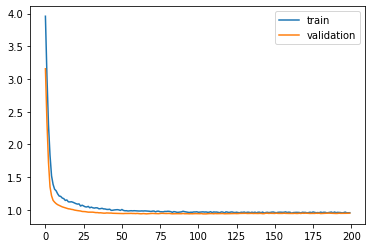

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

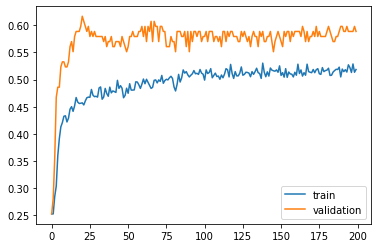

In [38]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [39]:
predictions = np.argmax(model.predict(x_test), axis=1)
accuracy = (predictions == y_test.values).sum() / y_test.values.shape[0]
print("Test set accuracy:", accuracy)

Test set accuracy: 0.55


## Betting Prediction

In [40]:
# agencies = ['B365', 'BW', 'IW', 'LB', 'WH', 'SJ', 'VC', 'GB', 'BS']
agencies = ['B365']

In [41]:
print("Test set size", y_test.shape)

Test set size (380,)


In [42]:
# x = [1,2,np.nan]
# np.nansum(x)

3.0

In [43]:
## Profit for Away Wins Only 
predict_always_on_one_thing_benefit(y_train, bet_train, [0]) #Data Train
predict_always_on_one_thing_benefit(y_test, bet_test, [0]) #Data Test

Agency B365, 	win amount: 475.51
Agency B365, 	win amount: -37.26


In [44]:
## Profit for Draw Only 
predict_always_on_one_thing_benefit(y_train, bet_train, [1]) #Data Train
predict_always_on_one_thing_benefit(y_test, bet_test, [1]) #Data Test

Agency B365, 	win amount: -345.36
Agency B365, 	win amount: -92.20


In [45]:
## Profit for Home Wins Only 
predict_always_on_one_thing_benefit(y_train, bet_train, [2]) #Data Train
predict_always_on_one_thing_benefit(y_test, bet_test, [2]) #Data Test

Agency B365, 	win amount: 6797.98
Agency B365, 	win amount: 582.66


In [46]:
## Profit for Home or Away 
predict_always_on_one_thing_benefit(y_train, bet_train, [0, 2]) #Data Train
predict_always_on_one_thing_benefit(y_test, bet_test, [0, 2]) #Data Test

Agency B365, 	win amount: 7273.49
Agency B365, 	win amount: 545.40


In [47]:
## Profit for All Possibilities
predict_always_on_one_thing_benefit(y_train, bet_train, [0, 1, 2]) #Data Train
predict_always_on_one_thing_benefit(y_test, bet_test, [0, 1, 2]) #Data Test

Agency B365, 	win amount: 6928.13
Agency B365, 	win amount: 453.20


In [48]:
train_predictions_3x1 = model.predict(x_train)
test_predictions_3x1 = model.predict(x_test)
train_predictions = np.argmax(train_predictions_3x1 , axis=1)
test_predictions = np.argmax(test_predictions_3x1 , axis=1)

In [49]:
# train_predictions
# test_predictions
print(train_predictions_3x1.shape)
print(test_predictions_3x1.shape)
# x_train.shape
# x_test.shape

(2660, 3)
(380, 3)


In [50]:
always_bet_predicted_winner_profit(train_predictions, y_train, bet_train)
always_bet_predicted_winner_profit(test_predictions, y_test, bet_test)

Agency B365, 	win amount: 8829.68
Agency B365, 	win amount: 733.60


In [51]:
bet_predicted_winner_with_threshold_profit(train_predictions_3x1, train_predictions, y_train, bet_train, threshold=1)
bet_predicted_winner_with_threshold_profit(test_predictions_3x1, test_predictions, y_test, bet_test, threshold=1)

Agency B365, 	win amount: 9913.08. Didn't bet on 45.41% of matches
Agency B365, 	win amount: 894.86. Didn't bet on 46.58% of matches


In [52]:
predict_on_highest_return(train_predictions_3x1, y_train, bet_train, threshold=2.5)
predict_on_highest_return(test_predictions_3x1, y_test, bet_test, threshold=2.5)

Agency B365, 	win amount: -283.00. Didn't bet on 60.38% of matches
Agency B365, 	win amount: -32.00. Didn't bet on 70.53% of matches


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
